# Imports

In [12]:
import numpy as np
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Balancing Data
from imblearn.over_sampling import SMOTE 
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from yellowbrick.datasets import load_concrete
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [13]:
# Python Scripts
%run -i "Scripts/functions.py"

## Encoding
Performing One-hot-encoding to keep interpretability

In [14]:
# Instatiating Encoder
ohe = OneHotEncoder(drop="first")

In [15]:
# Splitting Categorical Variables and Numeric Variables
cat_var = bank_df.select_dtypes(include="object")
num_var = bank_df.select_dtypes(exclude="object")

# Reseting Index
cat_var.reset_index(drop=True, inplace=True)
num_var.reset_index(drop=True, inplace=True)

In [16]:
# One hot encoding categorical variables
array_to_df = ohe.fit_transform(bank_df[cat_var.columns.tolist()]).toarray()  # Array values of the transformed columns

encoded = pd.DataFrame(array_to_df, columns=ohe.get_feature_names(cat_var.columns))  # Creating a pandas dataframe

bank_df = num_var.join(encoded, how="left")  # Combining the categorical variables and the numeric variables

In [17]:
bank_df.head()

,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,217646.0,730.0,1184194.0,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,548746.0,678.0,2559110.0,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,234124.0,727.0,693234.0,14211.24,24.7,46.0,10.0,1.0,28291.0,107052.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,666204.0,723.0,1821967.0,17612.24,22.0,34.0,15.0,0.0,813694.0,2004618.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,317108.0,687.0,1133274.0,9632.81,17.4,53.0,4.0,0.0,60287.0,126940.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
bank_df.columns

Index(['Current_Loan_Amount', 'Credit_Score', 'Annual_Income', 'Monthly_Debt',
       'Years_of_Credit_History', 'Months_since_last_delinquent',
       'Number_of_Open_Accounts', 'Number_of_Credit_Problems',
       'Current_Credit_Balance', 'Maximum_Open_Credit', 'Bankruptcies',
       'Tax_Liens', 'Loan_Status_Fully Paid', 'Term_Short Term',
       'Years_in_current_job_10+ years', 'Years_in_current_job_2 years',
       'Years_in_current_job_3 years', 'Years_in_current_job_4 years',
       'Years_in_current_job_5 years', 'Years_in_current_job_6 years',
       'Years_in_current_job_7 years', 'Years_in_current_job_8 years',
       'Years_in_current_job_9 years', 'Years_in_current_job_< 1 year',
       'Home_Ownership_Home Mortgage', 'Home_Ownership_Own Home',
       'Home_Ownership_Rent', 'Purpose_Buy House', 'Purpose_Buy a Car',
       'Purpose_Debt Consolidation', 'Purpose_Educational Expenses',
       'Purpose_Home Improvements', 'Purpose_Medical Bills', 'Purpose_Other',
       'Purp

## Splitting Data Into Training and Testing Sets

In [19]:
# Preparing the X, y train test data
X = bank_df.drop(columns=['Loan_Status_Fully Paid'], axis=1)  # Independent Varaibles
y = bank_df['Loan_Status_Fully Paid']  # Dependent Variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=123)

## Balancing Minority Data Using SMOTE
The values of the dependent variable are imbalanced, and will be fixed using SMOTE

In [20]:
# Looking at the balance of the dependent varaible
y_train.value_counts(normalize=True)

1.0    0.762062
0.0    0.237938
Name: Loan_Status_Fully Paid, dtype: float64

In [21]:
y_test.value_counts(normalize=True)

1.0    0.769243
0.0    0.230757
Name: Loan_Status_Fully Paid, dtype: float64

In [22]:
# Instantiating SMOTE
sm = SMOTE(random_state=123)

In [23]:
# Resampling the training sets
X_train, y_train = sm.fit_sample(X_train, y_train)

In [24]:
# Checking the balance in the training set
print(np.bincount(y_train))
print()
print(y_train.value_counts(normalize=True))

[19207 19207]

0.0    0.5
1.0    0.5
Name: Loan_Status_Fully Paid, dtype: float64


## Observation After SMOTE
The dependent variable is now balanced by 50%

# Modeling

### <span style="color:blue">------------------------------------------Base Line Model Logistic Regresssion------------------------------------------ </span>

Model can only do slightly better than random guesses.

Train Accuracy 0.6495027854428073
Test Accuracy 0.641168068560546


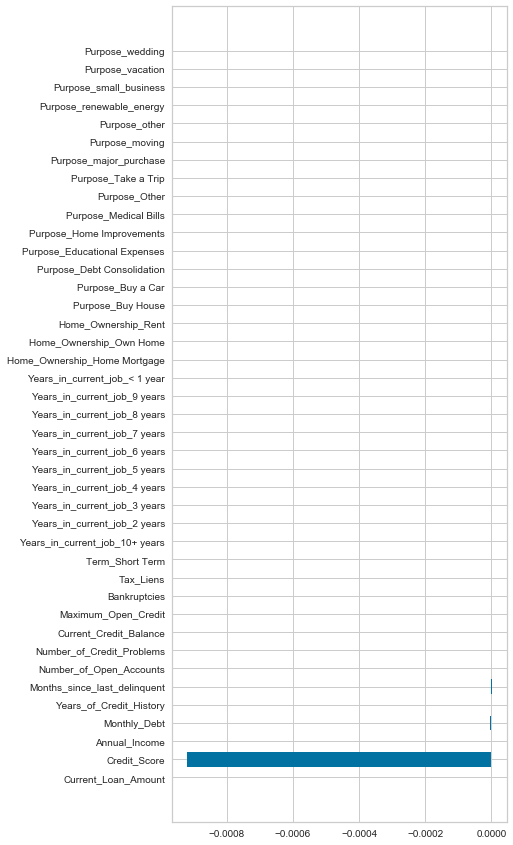

In [25]:
# Logistic Regression Model
logr_clf = LogisticRegression()
logr_clf.fit(X_train, y_train)
y_pred = logr_clf.predict(X_train)

print('Train Accuracy', logr_clf.score(X_train, y_train))
print('Test Accuracy', logr_clf.score(X_test, y_test))

# Graphing
fig, ax = plt.subplots(figsize=(6, 15))
ax.barh(y=X_train.columns, width=logr_clf.coef_[0]);

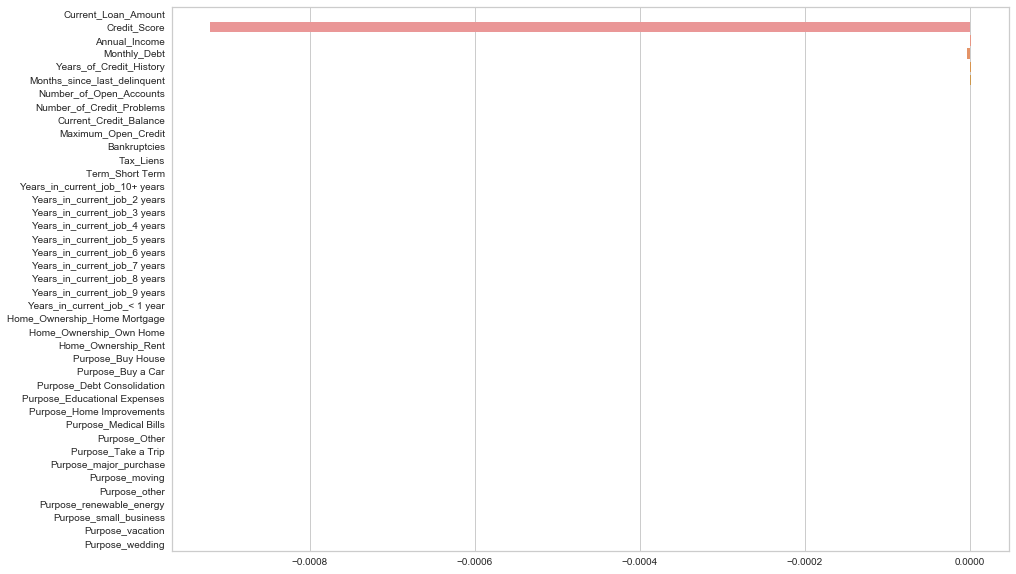

In [26]:
log_coef = logr_clf.coef_.reshape(-1)

# Figure size
plt.figure(figsize=(15, 10))

# Seaborn Barplot
sns.barplot(x=log_coef, y=X_train.columns)
plt.show()

### <span style="color:blue">------------------------------------------ Random Forest------------------------------------------</span>

Train Accuracy 0.8710886655906701
Test Accuracy 0.8265354705602286
OOB Score 0.868901962826053


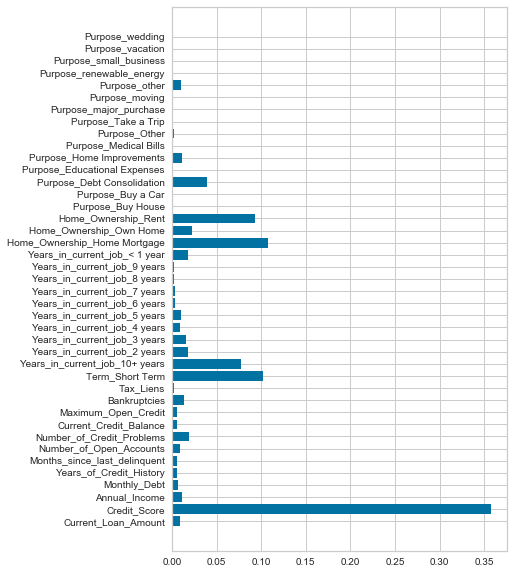

In [27]:
# Random Forest Model
rf_clf = RandomForestClassifier(n_estimators= 300, 
                                criterion= 'gini', 
                                max_depth= 10, 
                                max_features= 'auto',
                                oob_score= True)
rf_clf.fit(X_train, y_train.ravel())

# Finding the accuracy of train and test
accuracy_train = rf_clf.score(X_train, y_train)
accuracy_test = rf_clf.score(X_test, y_test)
oob = rf_clf.oob_score_

print('Train Accuracy', accuracy_train)
print('Test Accuracy', accuracy_test)
print('OOB Score', oob)

# Graphing
fig, ax = plt.subplots(figsize=(6, 10))
ax.barh(width=rf_clf.feature_importances_, y=X_train.columns);

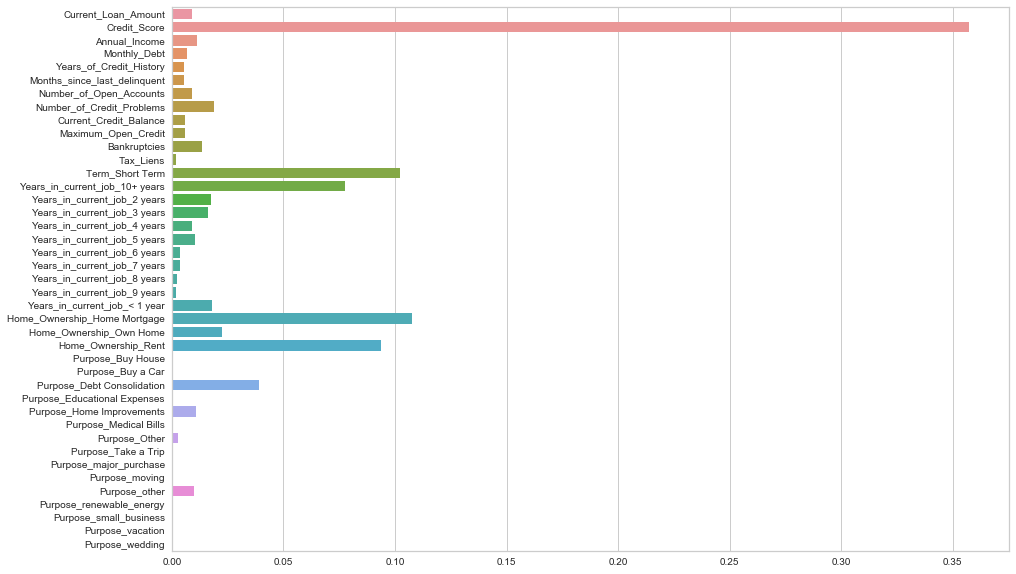

In [28]:
# Figure size
plt.figure(figsize=(15, 10))

# Seaborn Barplot
sns.barplot(x=rf_clf.feature_importances_, y=X_train.columns)
plt.show()

### <span style="color:blue">------------------------------------------ GradientBoostingClassifier------------------------------------------</span>

Train Accuracy 0.8764252616233665
Test Accuracy 0.8263767655927631


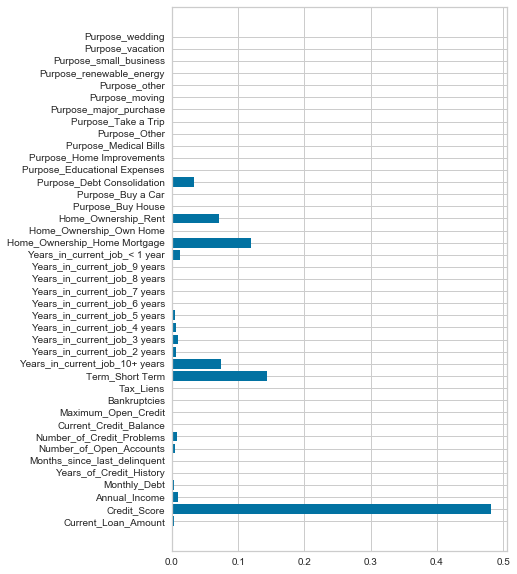

In [29]:
# Gradient Boost Model
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

# Accuracy of train and test
accuracy_train = gbc.score(X_train, y_train.ravel())
accuracy_test = gbc.score(X_test, y_test.ravel())

print('Train Accuracy', accuracy_train)
print('Test Accuracy', accuracy_test)

# Graphing
fig, ax = plt.subplots(figsize=(6, 10))
ax.barh(width=gbc.feature_importances_, y=X_train.columns);

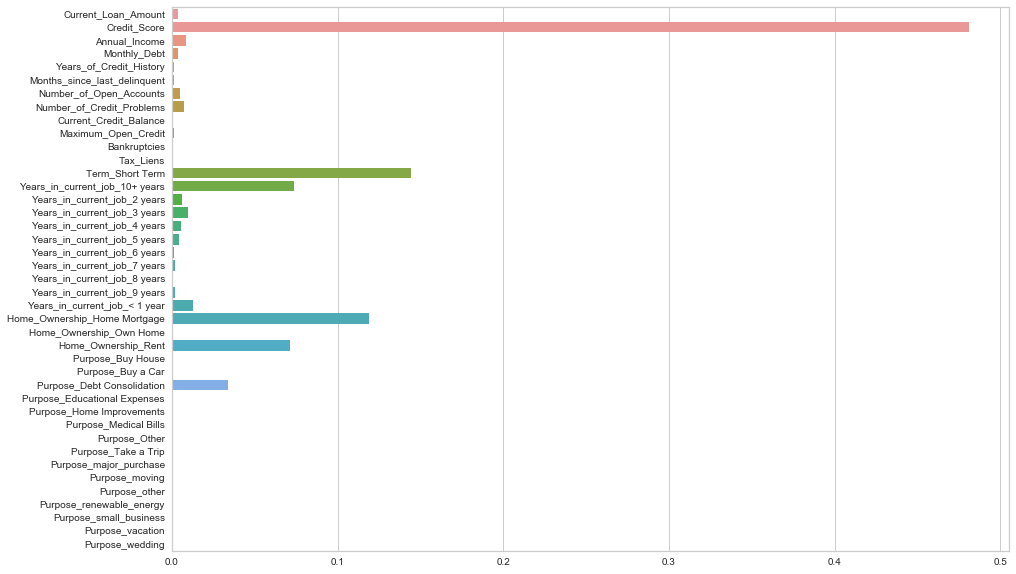

In [30]:
# Figure size
plt.figure(figsize=(15, 10))

# Seaborn Barplot
sns.barplot(x=gbc.feature_importances_, y=X_train.columns)
plt.show()

### <span style="color:blue">------------------------------------------AdaBoostClassifier------------------------------------------</span>

Train Accuracy 0.8678867079710523
Test Accuracy 0.8262180606252976


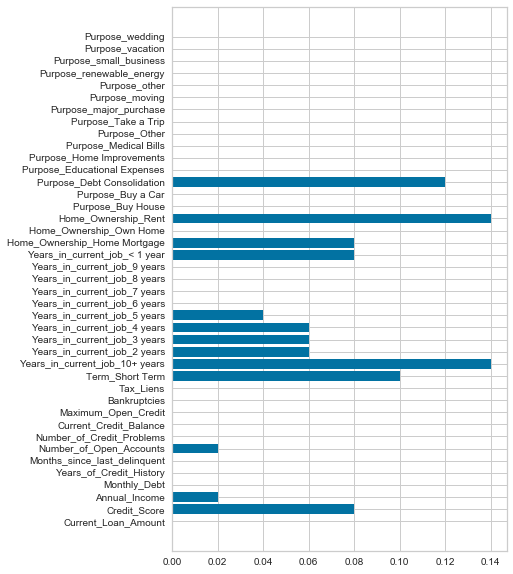

In [31]:
# Adaptation Boost Model
abc = AdaBoostClassifier(random_state=42)
abc.fit(X_train, y_train.ravel())

# Accuracy of train and test
accuracy_train = abc.score(X_train, y_train)
accuracy_test = abc.score(X_test, y_test)

print('Train Accuracy', accuracy_train)
print('Test Accuracy', accuracy_test)

# Graphing
fig, ax = plt.subplots(figsize=(6, 10))
ax.barh(width=abc.feature_importances_, y=X_train.columns);

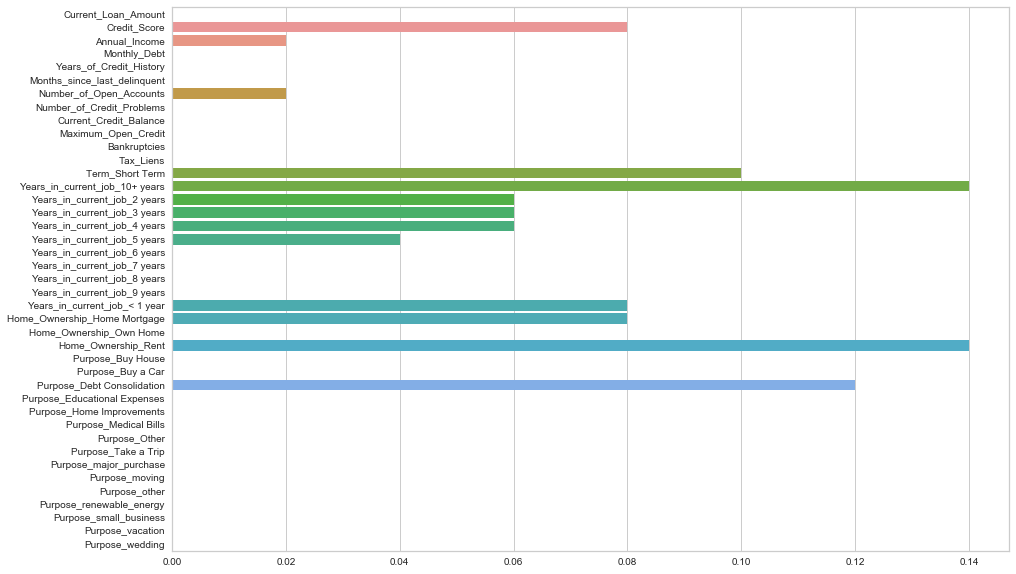

In [32]:
# Figure size
plt.figure(figsize=(15, 10))

# Seaborn Barplot
sns.barplot(x=abc.feature_importances_, y=X_train.columns)
plt.show()